**Logistic Regression**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('iris.csv')

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [61]:
# extract sepal length and sepal width of setosa and versicolor for our binary calssification problem
X = df.iloc[0:100, [1, 2]].values

y = df.iloc[0:100, 5].values
# set output lable value to 1 if it is setosa and 0 if versicolor.
y = np.where(y == 'Iris-setosa', 1, 0)

In [62]:
# features standerdization
X_std = np.copy(X)

X_std[:,0] = (X_std[:,0] - X_std[:,0].mean()) / X_std[:,0].std()
X_std[:,1] = (X_std[:,1] - X_std[:,1].mean()) / X_std[:,1].std()

1. we have a hypothesis fynction which in our case is y=theta0+theta1 X1+theta2 X2.
2. now we have to find a line that best fiths this equation 
3. we can find a line but that doesnt mean its the best fit line, to find the best fit line we have to use a optimization algorithm called gradient descent which does nothing but just minimizes the cost function
4. cost function is a function which calculates the difference between the actual and the predicted values.

In [63]:
# Define Logistic Regression hypothesis or sigmoid function

def sigmoid(X, theta):
    
    z = np.dot(X, theta[1:]) + theta[0]
    
    return 1.0 / ( 1.0 + np.exp(-z))

In [64]:
# Define Logistic Regression Cost Function
def lrCostFunction(y, hx):
  
    # compute cost for given theta parameters
    j = -y.dot(np.log(hx)) - ((1 - y).dot(np.log(1-hx)))
    
    return j

In [83]:
# Gradient Descent function to minimize the Logistic Regression Cost Function.
def lrGradient(X, y, theta, alpha, num_iter):
    # empty list to store the value of the cost function over number of iterations
    cost = []
    
    for i in range(num_iter):
        # call sigmoid function 
        hx = sigmoid(X, theta)
        # calculate error
        error = hx - y
        # calculate gradient
        grad = X.T.dot(error)
        # update values in theta
        theta[0] = theta[0] - alpha * error.sum()
        theta[1:] = theta[1:] - alpha * grad
        cost.append(lrCostFunction(y, hx))
        
    return cost        
        

In [ ]:
X.T.dot(hx-y)

In [84]:
# m = Number of training examples
# n = number of features
m, n = X.shape

# initialize theta(weights) parameters to zeros
theta = np.zeros(1+n)

# set learning rate to 0.01 and number of iterations to 500
alpha = 0.01
num_iter = 500

cost = lrGradient(X_std, y, theta, alpha, num_iter)

0 0.0 [-0.36414507  0.3420097 ]
1 -0.0005131327640707606 [-0.62452534  0.58452639]
2 -0.002474724512761418 [-0.82253806  0.76749931]
3 -0.005822252360389687 [-0.98199915  0.91366923]
4 -0.01019925076820648 [-1.11582933  1.03529898]
5 -0.015285126512530124 [-1.23150895  1.13947985]
6 -0.02084369344935524 [-1.33368848  1.23062939]
7 -0.026709201041263494 [-1.42543735  1.31167437]
8 -0.03276632428936019 [-1.50888172  1.38465159]
9 -0.03893451131666161 [-1.58555304  1.45103537]
10 -0.04515709272451453 [-1.65659027  1.51192758]
11 -0.05139392501965343 [-1.72286326  1.56817372]
12 -0.05761643076247699 [-1.78505136  1.62043704]
13 -0.06380422645827855 [-1.84369535  1.66924763]
14 -0.0699428017743813 [-1.89923282  1.71503599]
15 -0.07602190091826025 [-1.95202297  1.75815664]
16 -0.08203437875218669 [-2.00236436  1.79890508]
17 -0.08797538222830611 [-2.05050789  1.83753028]
18 -0.09384175779185923 [-2.09666653  1.87424397]
19 -0.09963161780734052 [-2.14102266  1.9092278 ]
20 -0.1053440202871419

452 -0.9042599834750009 [-6.16433301  4.45206252]
453 -0.9051512879858964 [-6.16826869  4.45440577]
454 -0.9060411385562759 [-6.17219758  4.456745  ]
455 -0.9069295408114482 [-6.17611971  4.45908023]
456 -0.9078165003427939 [-6.1800351   4.46141147]
457 -0.9087020227080388 [-6.18394378  4.46373873]
458 -0.9095861134315231 [-6.18784577  4.46606204]
459 -0.9104687780044696 [-6.19174111  4.46838141]
460 -0.9113500218852483 [-6.19562981  4.47069686]
461 -0.9122298504996383 [-6.1995119   4.47300839]
462 -0.9131082692410877 [-6.20338741  4.47531603]
463 -0.9139852834709701 [-6.20725637  4.47761978]
464 -0.9148608985188397 [-6.21111879  4.47991967]
465 -0.9157351196826828 [-6.21497471  4.48221571]
466 -0.9166079522291677 [-6.21882415  4.48450791]
467 -0.917479401393891 [-6.22266713  4.4867963 ]
468 -0.9183494723816231 [-6.22650368  4.48908087]
469 -0.9192181703665502 [-6.23033383  4.49136165]
470 -0.9200855004925137 [-6.23415759  4.49363865]
471 -0.9209514678732486 [-6.237975    4.49591189]
4

In [72]:
theta

array([-0.94466514, -6.34237524,  4.55808974])

Text(0.5, 1.0, 'Logistic Regression')

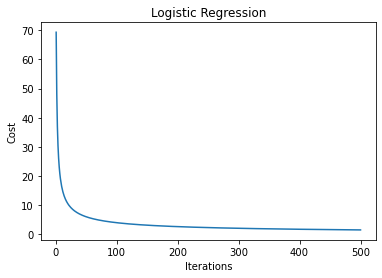

In [33]:
# Make a plot with number of iterations on the x-axis and the cost function on y-axis
plt.plot(range(1, len(cost) + 1), cost)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Logistic Regression')

In [34]:
# print theta paramters 
print ('\n Logisitc Regression bias(intercept) term :', theta[0])
print ('\n Logisitc Regression estimated coefficients :', theta[1:])


 Logisitc Regression bias(intercept) term : -0.9446651398200641

 Logisitc Regression estimated coefficients : [-6.34237524  4.55808974]


In [35]:
# function to predict the output label using the parameters
def lrPredict(X):
    
    return np.where(sigmoid(X,theta) >= 0.5, 1, 0)

In [36]:
from matplotlib.colors import ListedColormap

def plot_decision_boundry(X, y, classifier, h=0.02):
    # h = step size in the mesh
  
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h),
                         np.arange(x2_min, x2_max, h))
    Z = classifier(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)
  

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


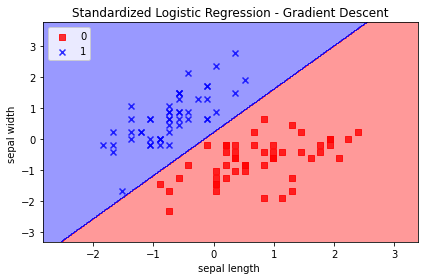

In [37]:
plot_decision_boundry(X_std, y, classifier=lrPredict)
plt.title('Standardized Logistic Regression - Gradient Descent')
plt.xlabel('sepal length ')
plt.ylabel('sepal width ')
plt.legend(loc='upper left')
plt.tight_layout()

In [38]:
from sklearn import linear_model

logreg = linear_model.LogisticRegression()

logreg.fit(X_std, y)

# print theta paramters 
print ('\n sklearn bias(intercept) term :', logreg.intercept_)
print ('\n sklearn estimated coefficients :', logreg.coef_)


 sklearn bias(intercept) term : [-0.2879227]

 sklearn estimated coefficients : [[-2.72500135  2.23666884]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


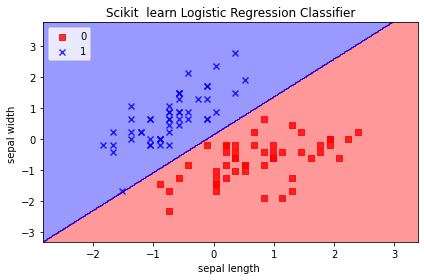

In [151]:
plot_decision_boundry(X_std, y, classifier=logreg.predict)
plt.title('Scikit  learn Logistic Regression Classifier')
plt.xlabel('sepal length ')
plt.ylabel('sepal width ')
plt.legend(loc='upper left')
plt.tight_layout()


#### Multiple linear regression

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
df=pd.read_csv('D:/explorra/datasets/Advertising.csv',index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [89]:
X=df[["TV",'radio','newspaper']]
Y=df['sales']
#standardisation of variables.
Y=np.array((Y-Y.mean())/Y.std())
X=X.apply(lambda rec:(rec-rec.mean())/rec.std(),axis=0)

In [92]:
#random generation of bias and weights values.
import random
def initialize(dim):
    b=random.random()
    theta=np.random.rand(dim)
    return b,theta
b,theta=initialize(3)
print('Bias: ',b,'Weights: ',theta)

Bias:  0.4652488446302745 Weights:  [0.10600803 0.27481782 0.96075356]


In [93]:
#prediction function
def predict_Y(b,theta,X):
    return b + np.dot(X,theta)
Y_hat=predict_Y(b,theta,X)
Y_hat[0:10]

array([ 2.54171832,  1.277155  ,  2.43318555,  2.03742777,  1.50463237,
        2.72967371,  0.22001641, -0.47186301, -1.40120345, -0.26475177])

In [94]:
#cost function
import math
def get_cost(Y,Y_hat):
    Y_resd=Y-Y_hat
    return np.sum(np.dot(Y_resd.T,Y_resd))/len(Y-Y_resd)
Y_hat=predict_Y(b,theta,X)
get_cost(Y,Y_hat)

1.500302093198632

In [117]:
#updating the values of theta
def update_theta(x,y,y_hat,b_0,theta_o,learning_rate):
    db=(np.sum(y_hat-y)*2)/len(y)
    dw=(np.dot((y_hat-y),x)*2)/len(y)
    b_1=b_0-learning_rate*db
    theta_1=theta_o-learning_rate*dw
    return b_1,theta_1
print("After initialization -Bias: ",b,"theta: ",theta)
Y_hat=predict_Y(b,theta,X)
b,theta=update_theta(X,Y,Y_hat,b,theta,0.01)
print("After first update -Bias: ",b,"theta: ",theta)
get_cost(Y,Y_hat)

After initialization -Bias:  0.3963921077068107 theta:  [0.36827037 0.28657166 0.5479295 ]
After first update -Bias:  0.3884642655526745 theta:  [0.37557781 0.28807297 0.53913433]


0.6616164524269685

In [141]:
def run_gradient_descent(X,Y,alpha,num_iterations):
    b,theta=initialize(X.shape[1])
    iter_num=0
    gd_iterations_df=pd.DataFrame(columns=['iteration','cost'])
    result_idx=0
    for each_iter in range(0,num_iterations):
        Y_hat=predict_Y(b,theta,X)
        this_cost=get_cost(Y,Y_hat)
        prev_b=b
        prev_theta=theta
        b,theta=update_theta(X,Y,Y_hat,prev_b,prev_theta,alpha)
        if(iter_num%10==0):
            gd_iterations_df.loc[result_idx]=[iter_num,this_cost]
            result_idx=result_idx+1
        iter_num +=1
    print("Final Estimate of b and theta : ",b,theta)
    return gd_iterations_df,b,theta


In [142]:
gd_iterations_df,b,theta=run_gradient_descent(X,Y,alpha=0.001,num_iterations=500)

Final Estimate of b and theta :  0.1678369865056512 [0.7474286  0.30092929 0.16405828]


In [143]:
gd_iterations_df.head()

,iteration,cost
0,0.0,0.548088
1,10.0,0.532560
2,20.0,0.517610
3,30.0,0.503216
4,40.0,0.489354


Text(0, 0.5, 'Cost or MSE')

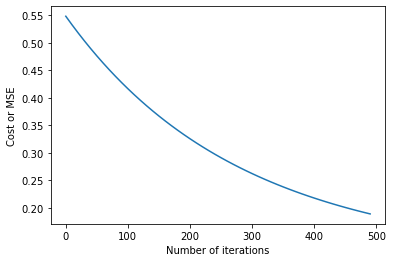

In [144]:

plt.plot(gd_iterations_df['iteration'],gd_iterations_df['cost'])
plt.xlabel('Number of iterations')
plt.ylabel('Cost or MSE')

Final Estimate of b and theta :  2.7723631733043826e-16 [ 0.75306591  0.53648155 -0.00433069]
Final Estimate of b and theta :  0.00836273380220625 [0.75312013 0.51248499 0.02521454]


Text(0.5, 1.0, 'Cost Vs. Iterations for different alpha values')

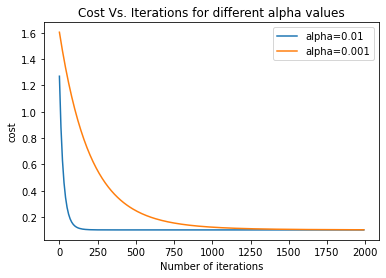

In [147]:
alpha_df_1,b,theta=run_gradient_descent(X,Y,alpha=0.01,num_iterations=2000)
alpha_df_2,b,theta=run_gradient_descent(X,Y,alpha=0.001,num_iterations=2000)
plt.plot(alpha_df_1['iteration'],alpha_df_1['cost'],label='alpha=0.01')
plt.plot(alpha_df_2['iteration'],alpha_df_2['cost'],label='alpha=0.001')
plt.legend()
plt.ylabel('cost')
plt.xlabel('Number of iterations')
plt.title('Cost Vs. Iterations for different alpha values')